In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import absolute
from numpy import mean
from numpy import std

In [2]:
df = pd.read_csv('grouped_data.csv', index_col=0)
df.drop(['WasRainingDuringRaceAnyTime'], axis=1, inplace=True)
df = df.loc[df['lapTireChange'].str.count(':') <= 3]
df['lapTireChange'] = df['lapTireChange'].str.replace('HYPERSOFT','SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('SUPERSOFT','SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('ULTRASOFT','SOFT').str.strip()
df['firstCompound'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[1].str.strip()
df['firstPitStop'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[0].str.strip()
df['secondCompound'] = df['lapTireChange'].str.split('->').str[1].str.split(":").str[0].str.split(',').str[0].str.strip()
df['secondPitStop'] = df['lapTireChange'].str.split('->').str[1].str.split(',').str[1].str.split(':').str[0].str.strip()
df['thirdCompound'] = df['lapTireChange'].str.split('->').str[2].str.split(':').str[0].str.split(',').str[0].str.strip()
df['thirdPitStop'] = df['lapTireChange'].str.split('->').str[2].str.split(',').str[1].str.split(':').str[0].str.strip()
df['fourthCompound'] = df['lapTireChange'].str.split('->').str[3].str.split(',').str[0].str.strip()
df = df[~df['firstCompound'].str.contains("INTERMEDIATE")]
df = df[~df['firstCompound'].str.contains('nan')]

quali_result_corr = df[['startingGridPosition', 'position']]
print(quali_result_corr.corr(method='pearson')['position'].iloc[0])

df.drop(['lapTireChange'], axis=1, inplace=True)
df.drop(['position'], axis=1, inplace=True)
df.drop(['positionDiff'], axis=1, inplace=True)
df.drop(['raceId'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)
df.drop(['raceName'], axis=1, inplace=True)
df

0.7288186640138503


,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,ALO,McLaren,13,Bahrain International Circuit,28.0,46.4,33.5,1.5,SOFT,14,MEDIUM,39,SOFT,NaN,NaN
16,BOT,Mercedes,3,Bahrain International Circuit,28.0,46.4,33.5,1.5,SOFT,20,MEDIUM,NaN,NaN,NaN,NaN
17,ERI,Sauber,17,Bahrain International Circuit,28.0,46.4,33.5,1.5,SOFT,23,MEDIUM,NaN,NaN,NaN,NaN
18,GAS,Toro Rosso,5,Bahrain International Circuit,28.0,46.4,33.5,1.5,SOFT,15,SOFT,34,SOFT,NaN,NaN
19,GRO,Haas F1 Team,16,Bahrain International Circuit,28.0,46.4,33.5,1.5,SOFT,18,SOFT,30,SOFT,45,SOFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,SAI,Ferrari,5,Yas Marina Circuit,25.6,53.5,33.0,0.7,SOFT,19,HARD,NaN,NaN,NaN,NaN
1341,STR,Aston Martin,13,Yas Marina Circuit,25.6,53.5,33.0,0.7,MEDIUM,21,HARD,52,SOFT,NaN,NaN
1342,TSU,AlphaTauri,8,Yas Marina Circuit,25.6,53.5,33.0,0.7,MEDIUM,23,HARD,53,SOFT,NaN,NaN
1343,VER,Red Bull,1,Yas Marina Circuit,25.6,53.5,33.0,0.7,SOFT,13,HARD,36,HARD,53,SOFT


In [3]:
factorizedDriverCode, driverCodeLabel = pd.factorize(df['driverCode'], sort=True)
factorizedTeamName, teamNameLabel = pd.factorize(df['teamName'], sort=True)
factorizedCircuitName, circuitNameLabel = pd.factorize(df['circuitName'], sort=True)
factorizedFirstCompound, firstCompoundLabel = pd.factorize(df['firstCompound'], sort=True, na_sentinel=3)
factorizedFirstPitStop, firstPitStopLabel = pd.factorize(df['firstPitStop'], sort=True, na_sentinel=58)
factorizedSecondCompound, secondCompoundLabel = pd.factorize(df['secondCompound'], sort=True, na_sentinel=3)
factorizedSecondPitStop, secondPitStopLabel = pd.factorize(df['secondPitStop'], sort=True, na_sentinel=58)
factorizedThirdCompound, thirdCompoundLabel = pd.factorize(df['thirdCompound'], sort=True, na_sentinel=3)
factorizedThirdPitStop, thirdPitStopLabel = pd.factorize(df['thirdPitStop'], sort=True, na_sentinel=58)
factorizedFourthCompound, fourthCompoundLabel = pd.factorize(df['fourthCompound'], sort=True, na_sentinel=3)
df['driverCode'] = factorizedDriverCode
df['teamName'] = factorizedTeamName
df['circuitName'] = factorizedCircuitName
df['firstCompound'] = factorizedFirstCompound
df['firstPitStop'] = factorizedFirstPitStop
df['secondCompound'] = factorizedSecondCompound
df['secondPitStop'] = factorizedSecondPitStop
df['thirdCompound'] = factorizedThirdCompound
df['thirdPitStop'] = factorizedThirdPitStop
df['fourthCompound'] = factorizedFourthCompound
df

,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,2,7,13,6,28.0,46.4,33.5,1.5,2,5,1,29,2,58,3
16,3,8,3,6,28.0,46.4,33.5,1.5,2,12,1,58,3,58,3
17,4,12,17,6,28.0,46.4,33.5,1.5,2,15,1,58,3,58,3
18,6,13,5,6,28.0,46.4,33.5,1.5,2,6,2,24,2,58,3
19,8,6,16,6,28.0,46.4,33.5,1.5,2,9,2,20,2,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,25,4,5,23,25.6,53.5,33.0,0.7,2,10,0,58,3,58,3
1341,27,3,13,23,25.6,53.5,33.0,0.7,1,13,0,43,2,58,3
1342,28,1,8,23,25.6,53.5,33.0,0.7,1,15,0,44,2,58,3
1343,30,10,1,23,25.6,53.5,33.0,0.7,2,4,0,26,0,28,2


In [109]:
df.describe()

,driverCode,teamName,startingGridPosition,circuitName,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,16.716484,7.310989,9.993407,12.016484,23.947253,50.681319,38.531978,1.433077,1.430769,15.725275,0.706593,13.280220,0.116484,1.231868,-0.745055
std,8.916731,4.211017,5.790243,6.847607,4.232426,13.439257,8.739320,0.995145,0.617973,12.962047,0.764058,16.845821,1.255857,7.086149,0.769933
min,0.000000,0.000000,0.000000,0.000000,16.800000,16.900000,23.500000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,4.000000,5.000000,6.000000,20.700000,40.000000,31.000000,0.600000,1.000000,6.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,18.000000,7.000000,10.000000,12.000000,23.700000,53.550000,38.500000,1.300000,1.000000,13.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000
75%,24.000000,10.000000,15.000000,18.000000,27.600000,60.200000,43.900000,2.100000,2.000000,20.000000,1.000000,27.000000,1.000000,-1.000000,-1.000000
max,31.000000,14.000000,20.000000,23.000000,34.200000,76.000000,57.000000,5.300000,2.000000,52.000000,3.000000,58.000000,3.000000,36.000000,3.000000


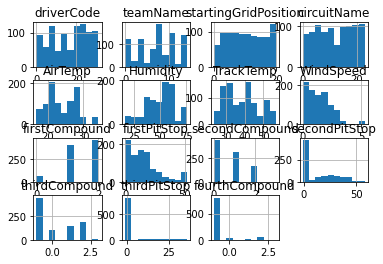

In [110]:
df.hist()
pyplot.show()

In [21]:
from sklearn.model_selection import train_test_split

array = df.values
X1 = array[:,0:8]
y1 = array[:,8:11]
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1, y1, test_size=0.20, random_state=1)

X2 = array[:,0:11]
y2 = array[:,11:13]
X2_train, X2_validation, y2_train, y2_validation = train_test_split(X2, y2, test_size=0.20, random_state=1)

X3 = array[:,0:13]
y3 = array[:,13:]
X3_train, X3_validation, y3_train, y3_validation = train_test_split(X3, y3, test_size=0.20, random_state=1)

In [22]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
models = [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(), MultiOutputRegressor(LinearSVR())]
for model in models:
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X1, y1, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    n_scores = absolute(n_scores)
    print(f'MAE: {mean(n_scores)} ({std(n_scores)})')

MAE: 3.403492063492064 (0.2520254195483012)
MAE: 3.5790708781034395 (0.24676332912415985)
MAE: 4.0677655677655675 (0.3927766595324933)
MAE: 3.765239388993979 (0.3040932477941175)


In [23]:
model1 = KNeighborsRegressor()
model1.fit(X1, y1)
predictions1 = model1.predict(X1_validation)
model2 = KNeighborsRegressor()
model2.fit(X2, y2)
predictions2 = model2.predict(X2_validation)
model3 = KNeighborsRegressor()
model3.fit(X3, y3)
predictions3 = model3.predict(X3_validation)
predictions1_df = pd.DataFrame(predictions1, columns=['firstCompound', 'firstPitStop', 'secondCompound'])
predictions2_df = pd.DataFrame(predictions2, columns=['secondPitStop', 'thirdCompound'])
predictions3_df = pd.DataFrame(predictions3, columns=['thirdPitStop', 'fourthCompound'])
predictions_df = predictions1_df.join(predictions2_df)
predictions_df = predictions_df.join(predictions3_df)
predictions_df = predictions_df.round()
predictions_df = predictions_df.loc[predictions_df['fourthCompound'] < 4]
i = 0
for compoundLabel in [firstCompoundLabel, secondCompoundLabel, thirdCompoundLabel, fourthCompoundLabel]:
    predictions_df.iloc[:, i] = compoundLabel[predictions_df.iloc[:, i].astype(int)]
    i += 2
predictions_df

,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
0,MEDIUM,26.0,HARD,30.0,SOFT,58.0,UNKNOWN
1,MEDIUM,17.0,HARD,28.0,HARD,58.0,UNKNOWN
2,SOFT,12.0,MEDIUM,58.0,UNKNOWN,58.0,UNKNOWN
3,MEDIUM,12.0,HARD,50.0,SOFT,58.0,UNKNOWN
4,SOFT,5.0,HARD,47.0,SOFT,58.0,UNKNOWN
...,...,...,...,...,...,...,...
177,SOFT,13.0,MEDIUM,49.0,SOFT,58.0,UNKNOWN
178,MEDIUM,23.0,MEDIUM,55.0,UNKNOWN,58.0,UNKNOWN
179,SOFT,13.0,SOFT,58.0,UNKNOWN,58.0,UNKNOWN
180,MEDIUM,10.0,HARD,58.0,UNKNOWN,58.0,UNKNOWN
